In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading Dataset

In [2]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
# Check for duplicate rows
duplicates = df.duplicated()

# Display rows with duplicates
print("Rows with duplicates:")
print(df[duplicates])


Rows with duplicates:
Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []


In [4]:
df.shape

(5630, 20)

In [5]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [6]:
new_df=df.drop('CustomerID',axis=1)

In [7]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,3.0,6.0,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0


In [8]:
import pandas as pd

#Check for missing values in each column
missing_values = new_df.isnull().sum()

#Check for missing values in the entire DataFrame
total_missing = new_df.isnull().sum().sum()

# Display missing values for each column
print("Missing Values by Column:")
print(missing_values)

# Display total missing values in the DataFrame
print("\nTotal Missing Values in the DataFrame:", total_missing)


Missing Values by Column:
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Total Missing Values in the DataFrame: 1856


#Filling Missing Values

In [9]:
columns_to_fill = ['OrderCount', 'CouponUsed', 'OrderAmountHikeFromlastYear','DaySinceLastOrder','Tenure','WarehouseToHome','HourSpendOnApp']
medians = new_df[columns_to_fill].median()
print(medians)
new_df[columns_to_fill] = new_df[columns_to_fill].fillna(medians)

OrderCount                      2.0
CouponUsed                      1.0
OrderAmountHikeFromlastYear    15.0
DaySinceLastOrder               3.0
Tenure                          9.0
WarehouseToHome                14.0
HourSpendOnApp                  3.0
dtype: float64


In [10]:
#Check for missing values in each column
missing_values = new_df.isnull().sum()
print(missing_values)

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [11]:
new_df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [12]:
# Save DataFrame to a CSV file in Colab
new_df.to_csv('/content/new_df.csv', index=False)

In [13]:
new_df.shape

(5630, 19)

#Exploratory Data Analysis (EDA)

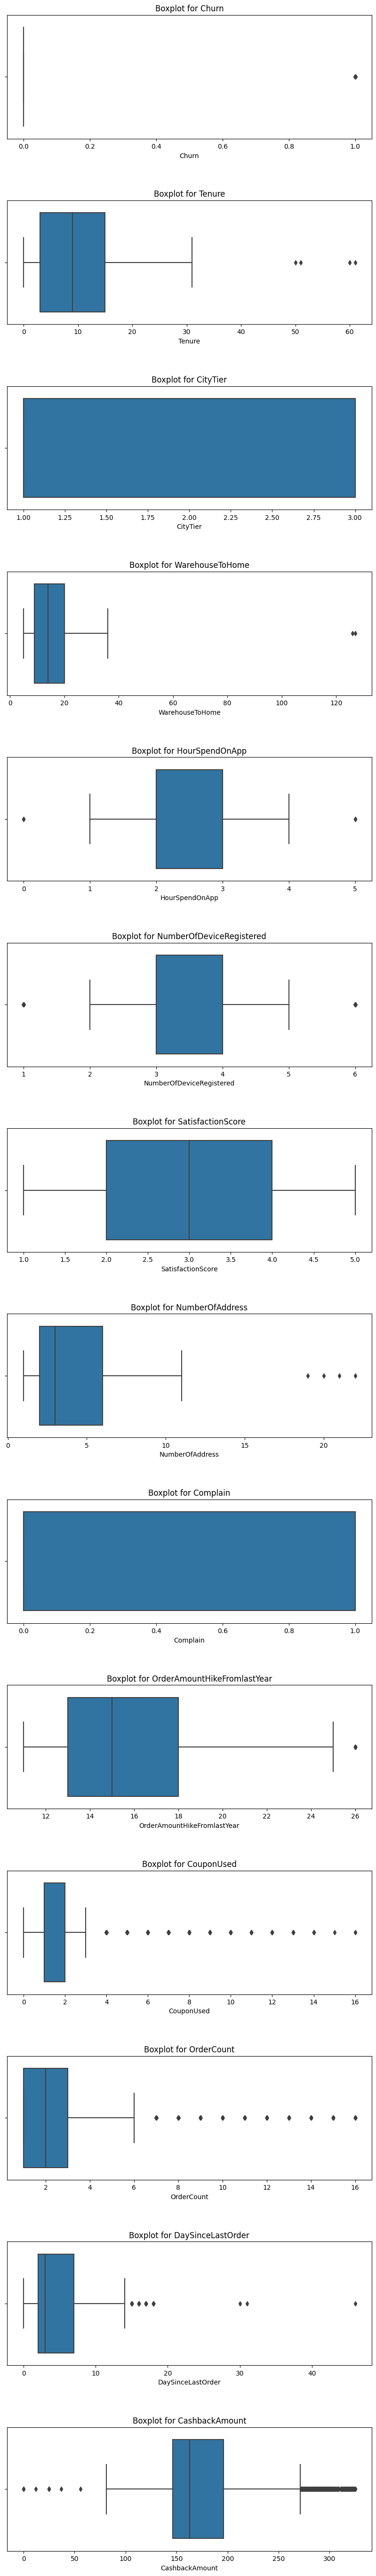

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame with numeric columns
# You might need to replace this with your actual DataFrame

# Filter numeric columns
numeric_columns = new_df.select_dtypes(include=['number']).columns

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 5 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=new_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.show()


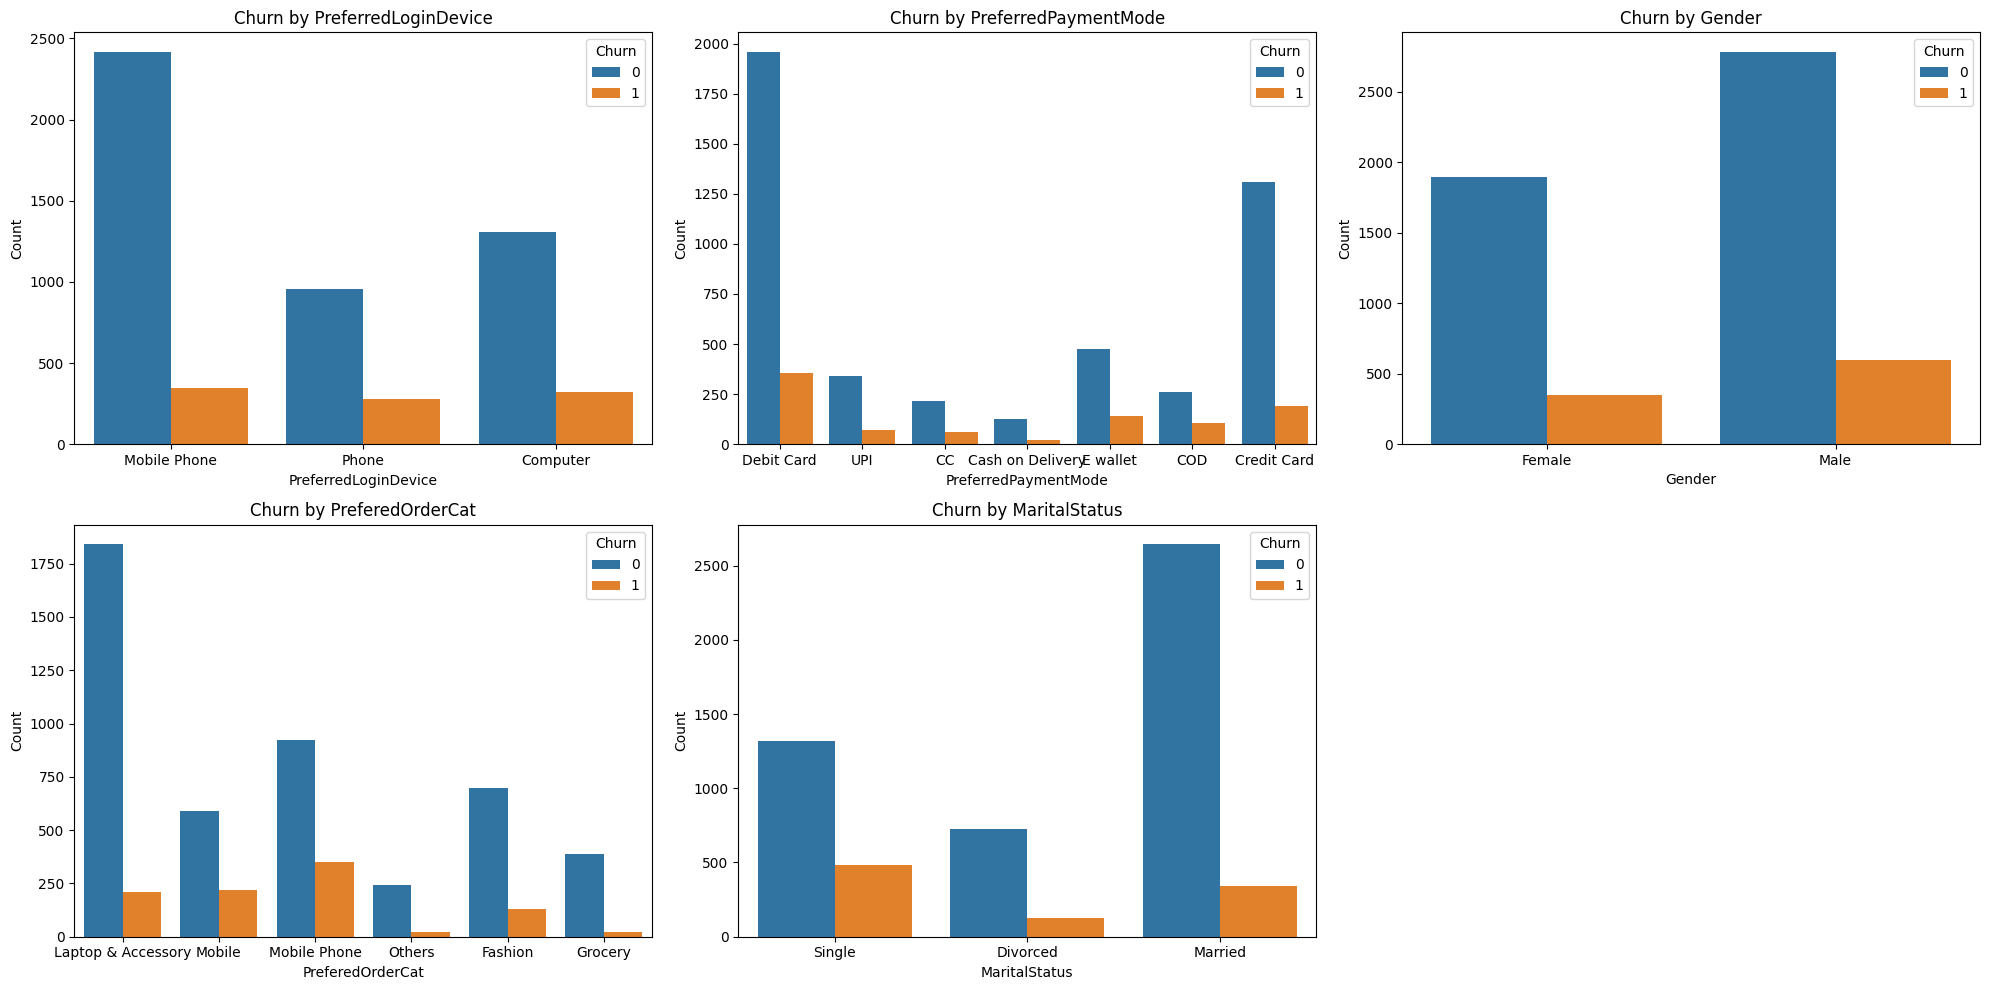

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named new_df
# You can select columns of dtype 'object' using select_dtypes
object_columns = new_df.select_dtypes(include='object').columns

# Set up subplots with increased figure size
plt.figure(figsize=(20, 10))  # Adjust the figsize as needed

# You can adjust the number of columns in the subplot grid
num_cols = 3
num_rows = (len(object_columns) + num_cols - 1) // num_cols

for i, col in enumerate(object_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, hue='Churn', data=new_df)
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



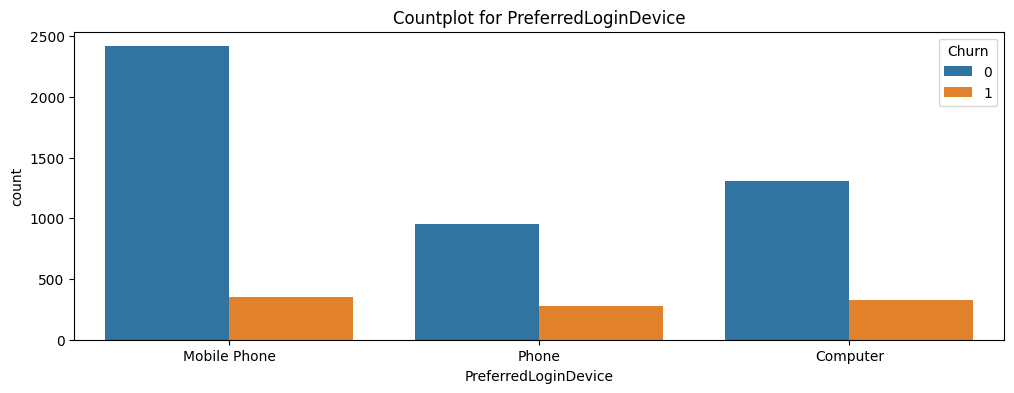

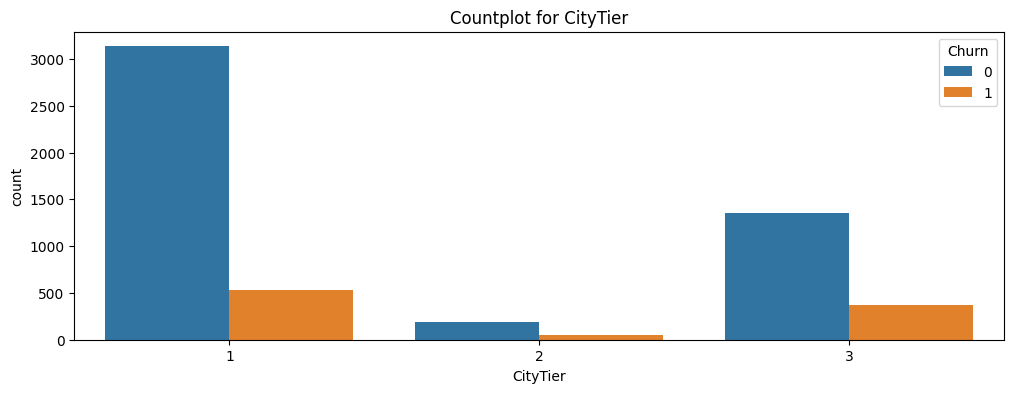

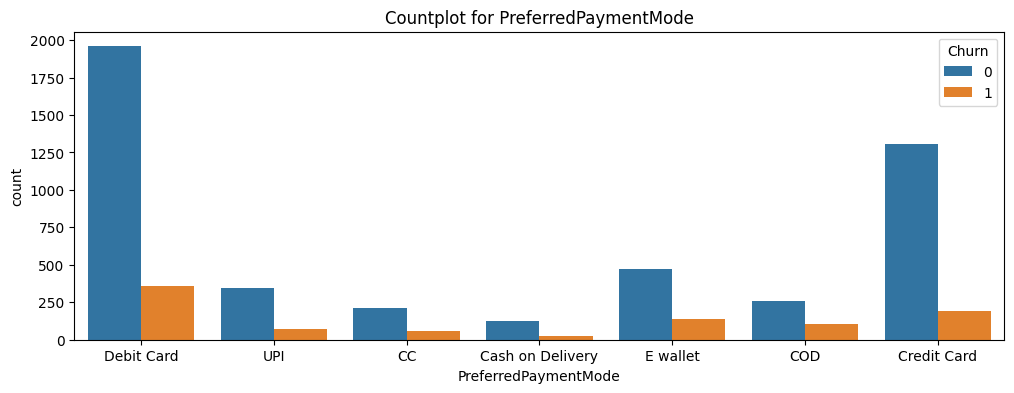

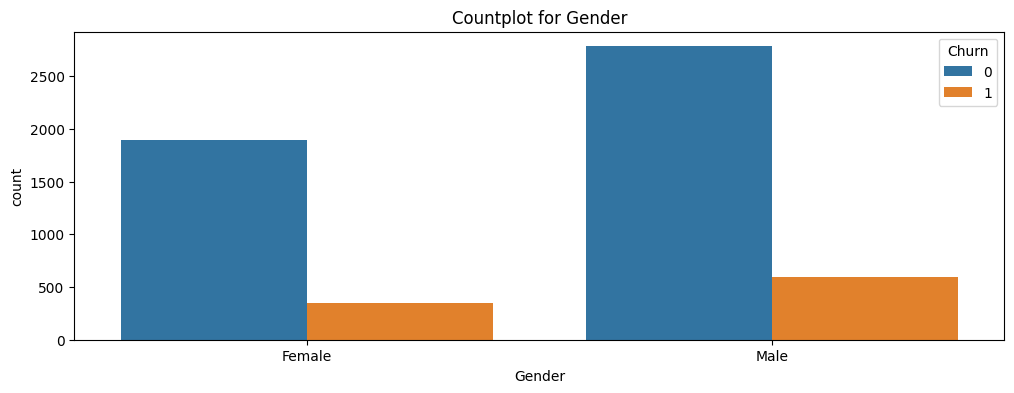

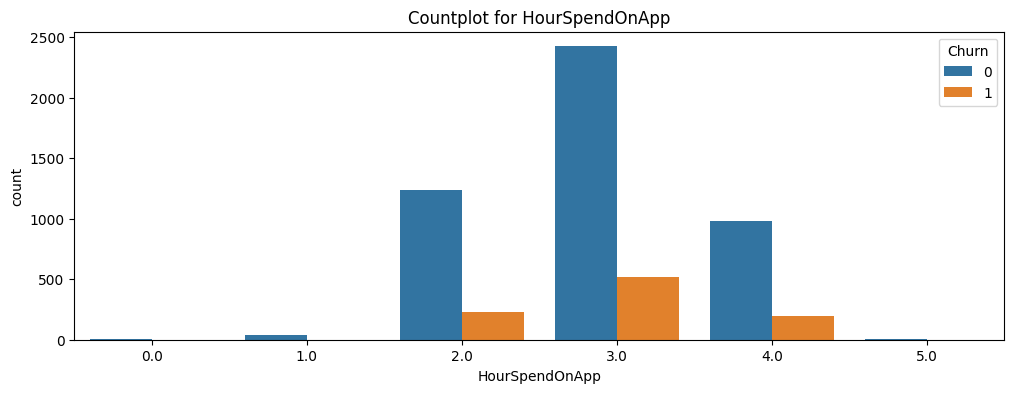

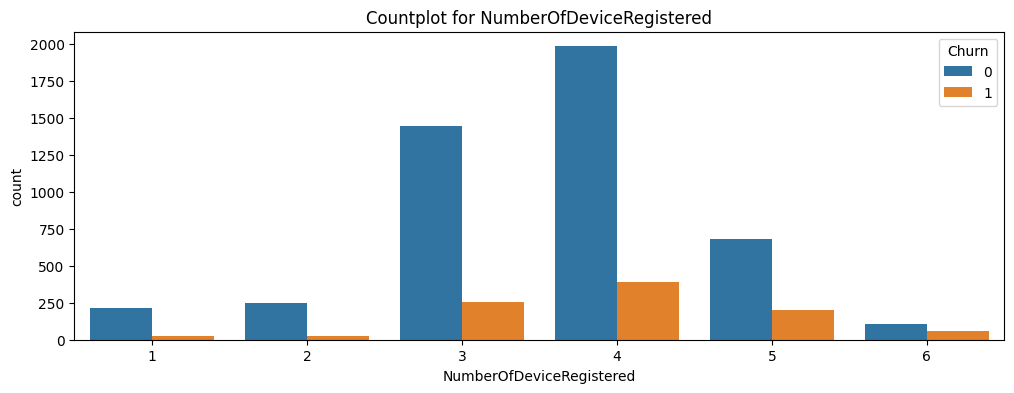

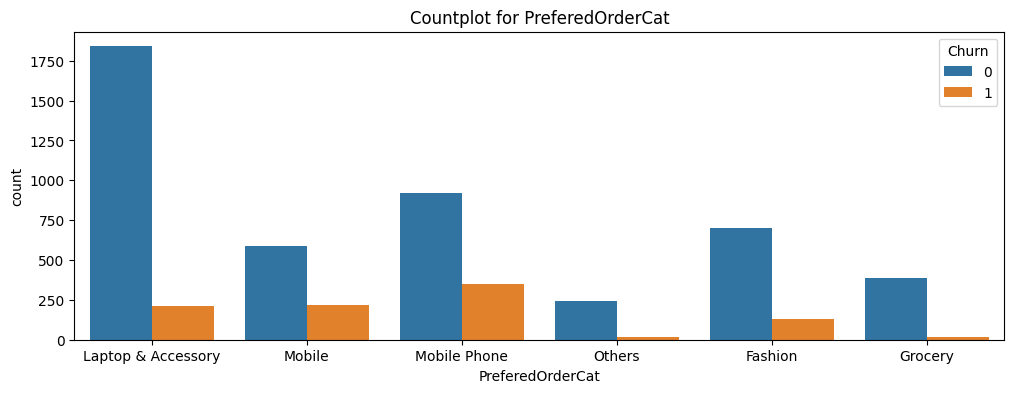

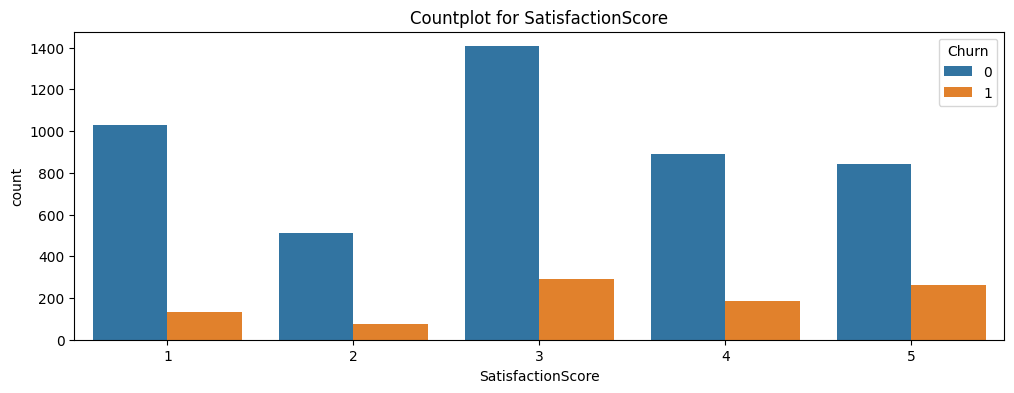

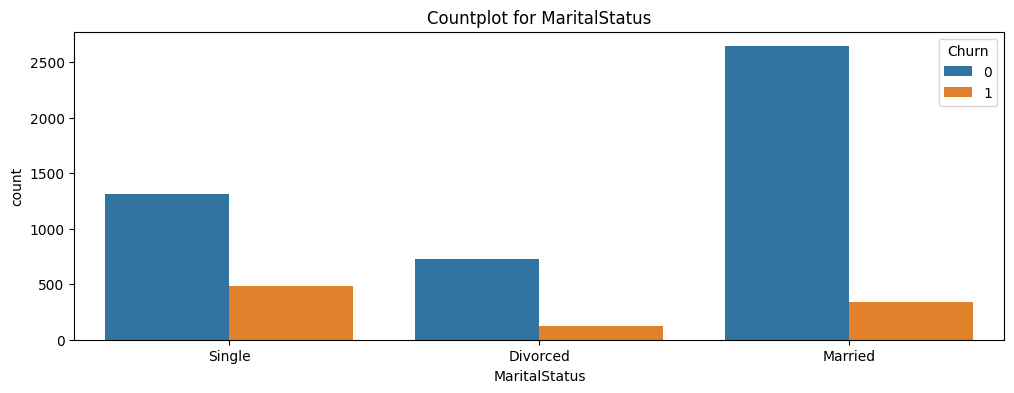

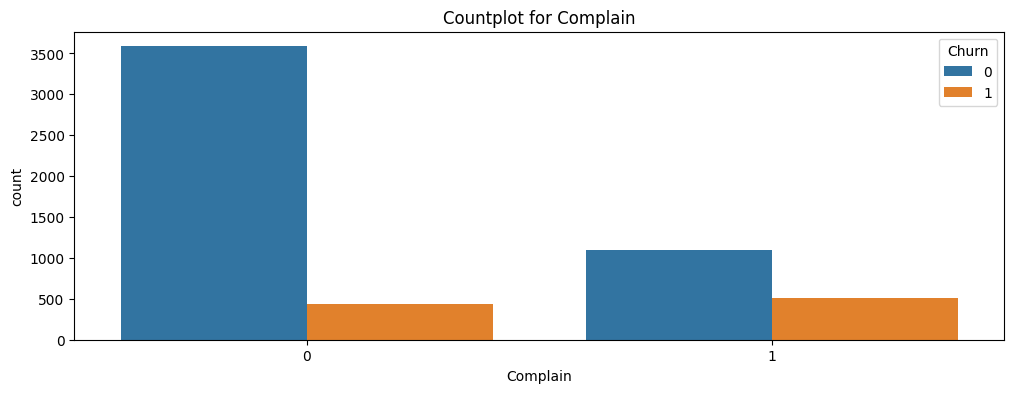

In [19]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','OrderAmountHikeFromlastYear','CouponUsed','Tenure','CashbackAmount','WarehouseToHome','OrderCount','DaySinceLastOrder','NumberOfAddress'])):
    plt.figure(i, figsize=(12, 4))  # Adjust the figsize as needed
    sns.countplot(data=new_df, x=predictor, hue='Churn')
    plt.title(f'Countplot for {predictor}')
    plt.show()


In [20]:
numeric_column_names = new_df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_column_names)

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [21]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in new_df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {new_df[col].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


#Categorical variable into Numerical Variable using LabelEncoding

In [22]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in new_df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(new_df[col].unique())

    # Transform the column using the encoder
    new_df[col] = label_encoder.transform(new_df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {new_df[col].unique()}")

PreferredLoginDevice: [1 2 0]
PreferredPaymentMode: [4 6 0 2 5 1 3]
Gender: [0 1]
PreferedOrderCat: [2 3 4 5 0 1]
MaritalStatus: [2 0 1]


#Correlation Matrix
Feature Selection

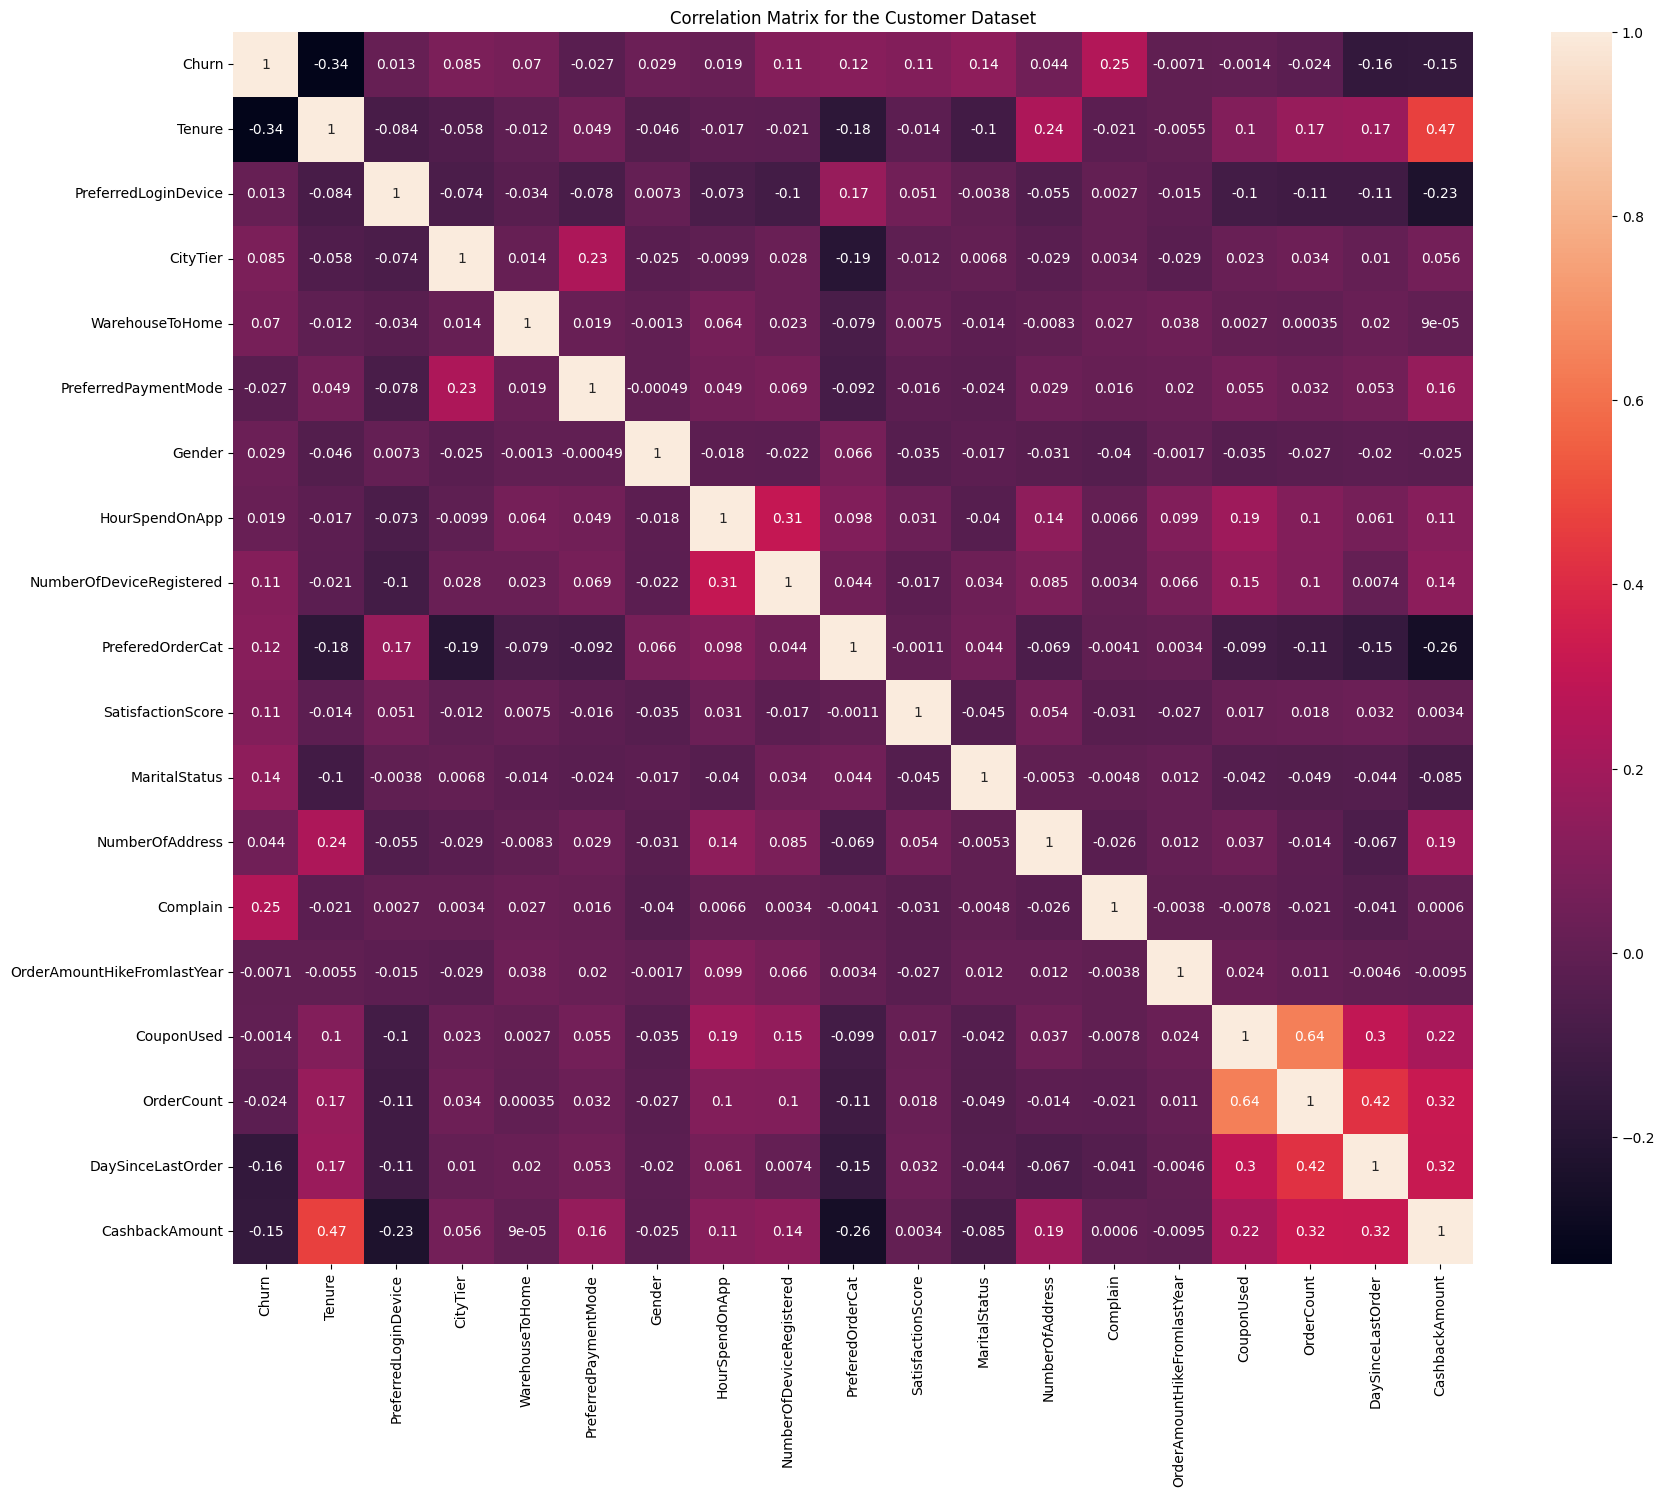

In [23]:
plt.figure(figsize=(20, 16))
sns.heatmap(new_df.corr(), fmt='.2g', annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

In [24]:
corr = new_df.corrwith(new_df["Churn"])
corr

Churn                          1.000000
Tenure                        -0.337831
PreferredLoginDevice           0.013281
CityTier                       0.084703
WarehouseToHome                0.069544
PreferredPaymentMode          -0.026519
Gender                         0.029264
HourSpendOnApp                 0.018816
NumberOfDeviceRegistered       0.107939
PreferedOrderCat               0.118922
SatisfactionScore              0.105481
MaritalStatus                  0.140316
NumberOfAddress                0.043931
Complain                       0.250188
OrderAmountHikeFromlastYear   -0.007075
CouponUsed                    -0.001430
OrderCount                    -0.024038
DaySinceLastOrder             -0.155871
CashbackAmount                -0.154161
dtype: float64

Feature Extraction

In [25]:
filtered_correlation = corr[corr.abs() > 0.02]
filtered_correlation

Churn                       1.000000
Tenure                     -0.337831
CityTier                    0.084703
WarehouseToHome             0.069544
PreferredPaymentMode       -0.026519
Gender                      0.029264
NumberOfDeviceRegistered    0.107939
PreferedOrderCat            0.118922
SatisfactionScore           0.105481
MaritalStatus               0.140316
NumberOfAddress             0.043931
Complain                    0.250188
OrderCount                 -0.024038
DaySinceLastOrder          -0.155871
CashbackAmount             -0.154161
dtype: float64

In [26]:
new_df = new_df.drop(['PreferredLoginDevice','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed'],axis = 1)

In [27]:
new_df

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,4,0,3,2,2,2,9,1,1.0,5.0,160
1,1,9.0,1,8.0,6,1,4,3,3,2,7,1,1.0,0.0,121
2,1,9.0,1,30.0,4,1,4,3,3,2,6,1,1.0,3.0,120
3,1,0.0,3,15.0,4,1,4,2,5,2,8,0,1.0,3.0,134
4,1,0.0,1,12.0,0,1,3,3,5,2,3,0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3,1,2,2,1,1,6,0,2.0,4.0,151
5626,0,13.0,1,13.0,3,1,5,0,5,1,6,0,2.0,3.0,225
5627,0,1.0,1,11.0,4,1,2,2,4,1,3,1,2.0,4.0,186
5628,0,23.0,3,9.0,3,1,5,2,4,1,4,0,2.0,9.0,179


In [28]:
new_df.shape

(5630, 15)

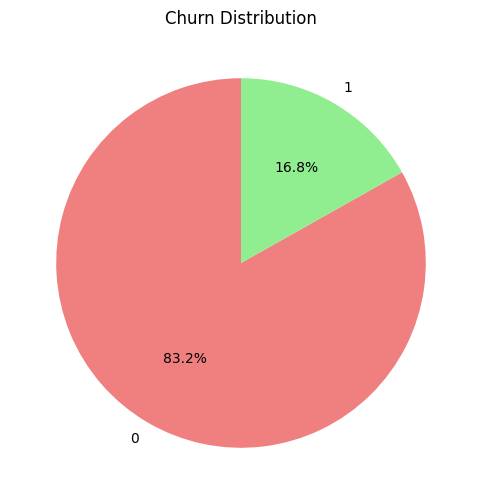

In [29]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
churn_counts = new_df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Churn Distribution')
plt.show()

#Balacing data using SMOTE

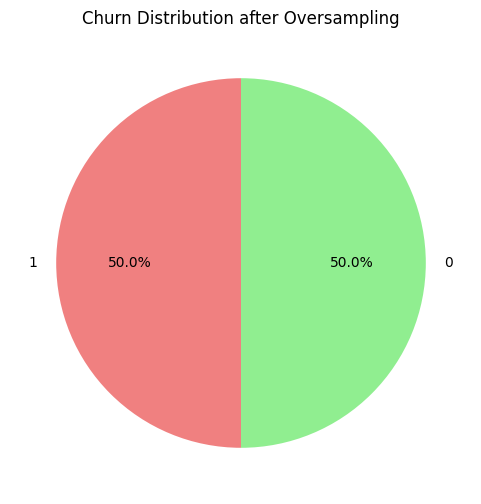

In [30]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
X = new_df.drop('Churn', axis=1)  # Features
y = new_df['Churn']  # Target variable

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = X_resampled.copy()
df_resampled['Churn'] = y_resampled

# Check the balance after oversampling
churn_counts_resampled = df_resampled['Churn'].value_counts()
labels_resampled = churn_counts_resampled.index
sizes_resampled = churn_counts_resampled.values

# Create a pie chart for the resampled data
plt.figure(figsize=(6, 6))
plt.pie(sizes_resampled, labels=labels_resampled, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Churn Distribution after Oversampling')
plt.show()


In [31]:
churn_value_counts = df_resampled['Churn'].value_counts()

# Display the value counts
print(churn_value_counts)

1    4682
0    4682
Name: Churn, dtype: int64


In [32]:
# List of columns to convert
'''columns_to_convert = ['Tenure','WarehouseToHome','OrderCount', 'DaySinceLastOrder']

# Convert float columns to integers
df_resampled[columns_to_convert] = df_resampled[columns_to_convert].astype(int)'''

"columns_to_convert = ['Tenure','WarehouseToHome','OrderCount', 'DaySinceLastOrder']\n\n# Convert float columns to integers\ndf_resampled[columns_to_convert] = df_resampled[columns_to_convert].astype(int)"

In [33]:
# Save DataFrame to a CSV file in Colab
df_resampled.to_csv('/content/updated_df.csv', index=False)

In [34]:
df_resampled.shape

(9364, 15)

In [35]:
df_resampled.dtypes

Tenure                      float64
CityTier                      int64
WarehouseToHome             float64
PreferredPaymentMode          int64
Gender                        int64
NumberOfDeviceRegistered      int64
PreferedOrderCat              int64
SatisfactionScore             int64
MaritalStatus                 int64
NumberOfAddress               int64
Complain                      int64
OrderCount                  float64
DaySinceLastOrder           float64
CashbackAmount                int64
Churn                         int64
dtype: object

#Training and Testing Split

In [36]:
# First we need to the data into 70% training dataset and 30% testing dataset
X = df_resampled.drop(['Churn'],axis=1)
y = df_resampled['Churn']

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

#Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

AUC-ROC: 0.8304784831274832
Accuracy: 0.7494661921708186

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      1401
           1       0.73      0.79      0.76      1409

    accuracy                           0.75      2810
   macro avg       0.75      0.75      0.75      2810
weighted avg       0.75      0.75      0.75      2810



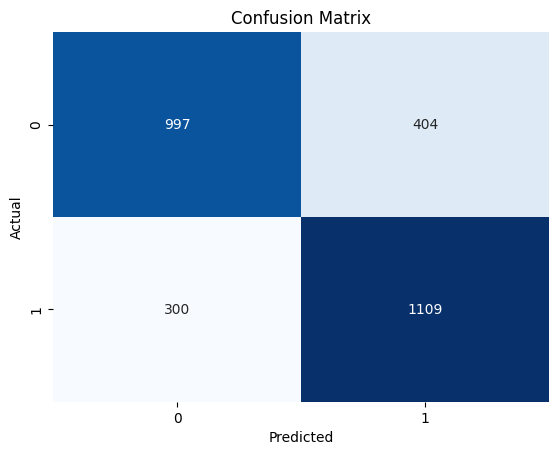

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs')  # Specify the lbfgs solver

# Define hyperparameters to tune
lg_param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l2', 'none']}  # Use only 'l2' or 'none'

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, lg_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params, solver='lbfgs')
best_logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_logreg.predict(X_test_scaled)

# Calculate AUC-ROC
y_pred_prob = best_logreg.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print AUC-ROC
print("AUC-ROC:", auc_roc)

# Print classification report and accuracy
lg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lg_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#KNN

AUC-ROC: 0.9593471964920118
Accuracy: 0.9594306049822064

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1401
           1       0.93      0.99      0.96      1409

    accuracy                           0.96      2810
   macro avg       0.96      0.96      0.96      2810
weighted avg       0.96      0.96      0.96      2810



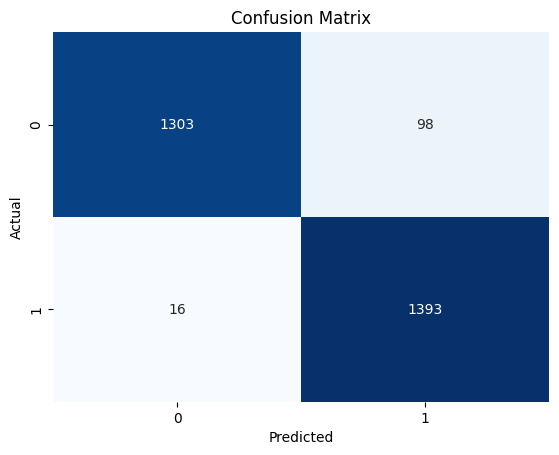

In [44]:
# Create a KNN model
knn = KNeighborsClassifier()

# Define hyperparameters to tune
knn_param_grid = {'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the KNN model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Calculate AUC-ROC
y_pred_prob = best_knn.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print AUC-ROC
print("AUC-ROC:", auc_roc)

# Print classification report and accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Random Forest

AUC-ROC: 0.4807498344739057
Accuracy: 0.9775800711743772
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1401
           1       0.96      0.99      0.98      1409

    accuracy                           0.98      2810
   macro avg       0.98      0.98      0.98      2810
weighted avg       0.98      0.98      0.98      2810



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


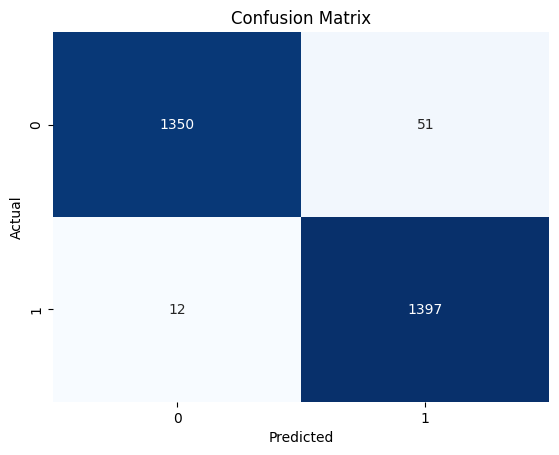

In [45]:
# Define hyperparameters to tune
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate AUC-ROC
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print AUC-ROC
print("AUC-ROC:", auc_roc)

# Calculate and print accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#XGBoost

AUC-ROC: 0.5610131463433043
Accuracy: 0.9829181494661922
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1401
           1       0.97      1.00      0.98      1409

    accuracy                           0.98      2810
   macro avg       0.98      0.98      0.98      2810
weighted avg       0.98      0.98      0.98      2810



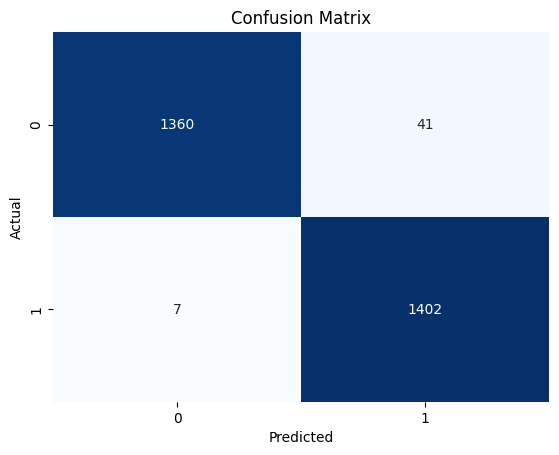

In [46]:
# Define hyperparameters to tune
xg_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_model, xg_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate AUC-ROC
y_pred_prob = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print AUC-ROC
print("AUC-ROC:", auc_roc)

# Calculate and print accuracy
xg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xg_accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AUC-ROC: 0.6241200014792232
Accuracy: 0.8263345195729538
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1401
           1       0.83      0.82      0.83      1409

    accuracy                           0.83      2810
   macro avg       0.83      0.83      0.83      2810
weighted avg       0.83      0.83      0.83      2810



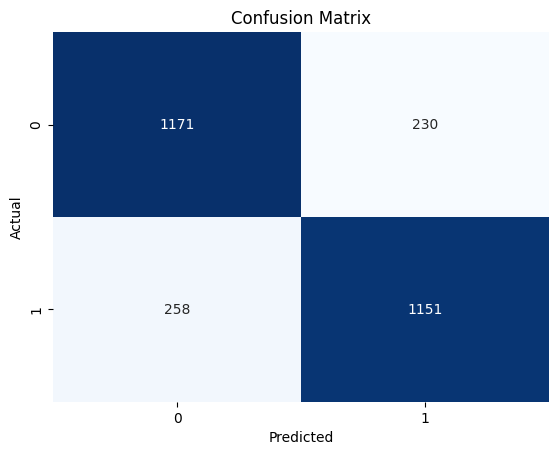

In [47]:
# Define hyperparameters to tune
adb_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}

# Create an AdaBoost classifier
adaboost_model = AdaBoostClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost_model, adb_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the AdaBoost model with the best hyperparameters
best_adaboost_model = AdaBoostClassifier(**best_params, random_state=42)
best_adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_adaboost_model.predict(X_test)

# Calculate AUC-ROC
y_pred_prob = best_adaboost_model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print AUC-ROC
print("AUC-ROC:", auc_roc)

# Calculate and print accuracy
adb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", adb_accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.2 MB/s eta 0:00:00


#Comparing Accuracy

In [49]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':lg_accuracy},
    "K-nearest neighbours":{'Accuracy':knn_accuracy},
    "Random Forest":{'Accuracy':rf_accuracy},
    "XgBoost":{'Accuracy':xg_accuracy},
    "AdaBoost":{'Accuracy':adb_accuracy}
}).T

In [50]:
comparison

,Accuracy
Logistic regression,0.749466
K-nearest neighbours,0.959431
Random Forest,0.977580
XgBoost,0.982918
AdaBoost,0.826335


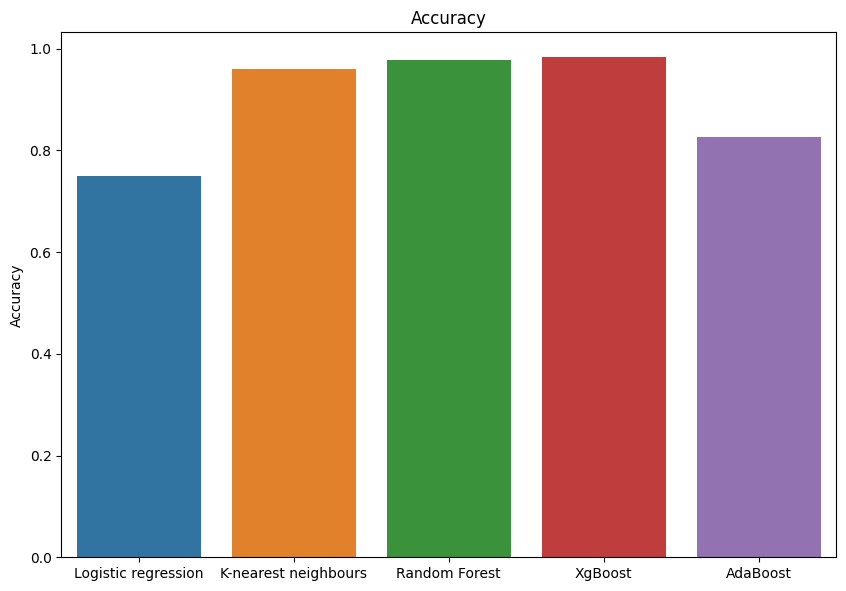

In [51]:
#visulizing Accuuracy with graph
fig = plt.gcf()
fig.set_size_inches(22, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

#SHAP (SHapley Additive exPlanations) Ananlysis

[03:09:38] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


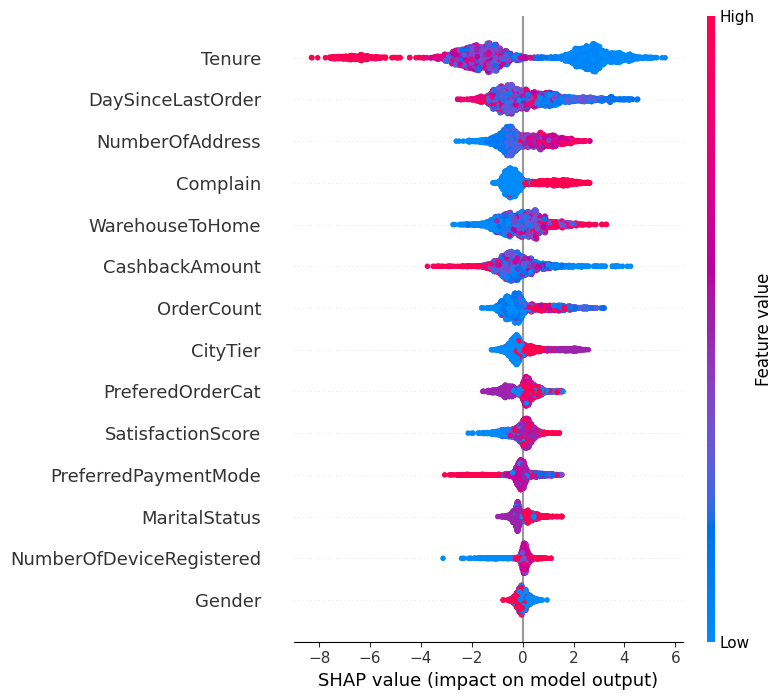

In [52]:
# Use SHAP to explain the best model
import shap
# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Use SHAP to explain the best model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test)

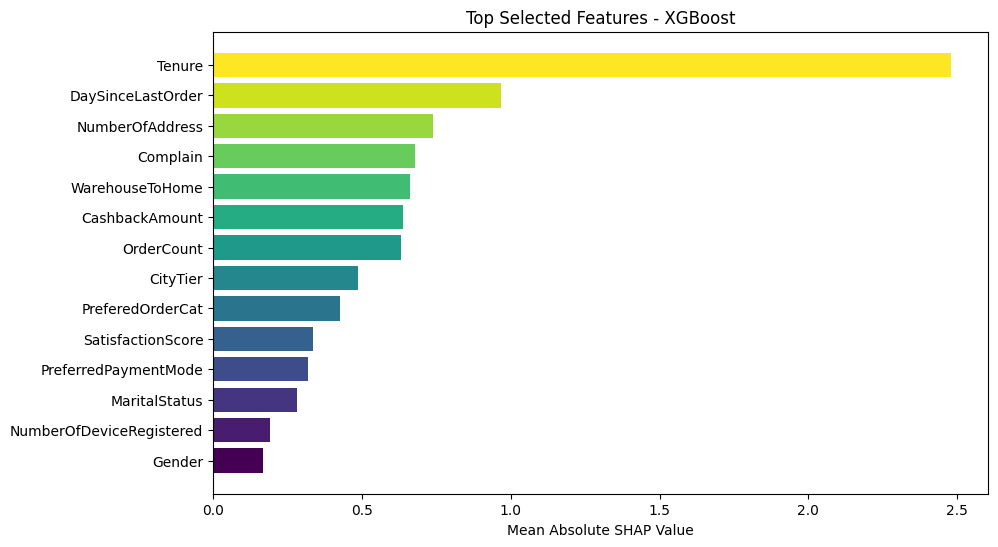

In [53]:
# Calculate mean absolute SHAP values
mean_absolute_shap_values = np.mean(np.abs(shap_values), axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame(list(zip(X_test.columns, mean_absolute_shap_values)),
                                   columns=['Feature', 'Mean Absolute SHAP Value'])

# Sort features based on importance
feature_importance = feature_importance.sort_values(by='Mean Absolute SHAP Value', ascending=True)

# Select top features
top_features = feature_importance

# Plot the top features with colorful bars
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))  # Use viridis colormap
plt.barh(top_features['Feature'], top_features['Mean Absolute SHAP Value'], color=colors)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top Selected Features - XGBoost')
plt.show()


# Saving Model

In [54]:
import pickle

# Assuming xgb_model is your trained XGBoost model
xgb_model.fit(X_train, y_train)  # Make sure to fit the model before saving

# Save the model to a file using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
